# import Libraries

In [98]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score
from sklearn.metrics import roc_auc_score,roc_curve,multilabel_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('diabetes.csv')
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148            500             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672  102        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [42]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
x = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [45]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [46]:
268/(268+500)

0.3489583333333333

In [47]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state=11,test_size=0.2,stratify=y)

y_train.value_counts()

In [48]:
209/(209+405)

0.34039087947882735

In [49]:
214/(214+405)

0.345718901453958

# model Training

In [50]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

# Evaluation

In [54]:
y_pred = log_model.predict(x_test)
y_pred[:5]

array([1, 0, 1, 1, 0], dtype=int64)

In [55]:
y_test[:5]

445    1
66     1
670    0
663    1
430    0
Name: Outcome, dtype: int64

In [ ]:
TP >> 2
TN >> 1
FP >> 1
FN >> 1

TP FP
FN TN

In [57]:
confusion_matrix(y_test[:5],y_pred[:5])

array([[1, 1],
       [1, 2]], dtype=int64)

In [59]:
confusion_matrix(y_test,y_pred)

array([[89, 11],
       [27, 27]], dtype=int64)

In [60]:
(89+27)/(89+27+27+11)

0.7532467532467533

In [65]:
89+27+27+11

154

In [62]:
accuracy_score(y_test,y_pred)

0.7532467532467533

In [64]:
clf_report = classification_report(y_test,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       0.77      0.89      0.82       100
           1       0.71      0.50      0.59        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [72]:
y_pred = log_model.predict(x_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [78]:
y_pred_prob = log_model.predict_proba(x_test)
# y_pred_prob[:,1]

# ROC Curve

In [79]:
fpr,tpr,thresh = roc_curve(y_test,y_pred_prob[:,1])

In [92]:
fpr

array([0.  , 0.  , 0.  , 0.02, 0.02, 0.04, 0.04, 0.05, 0.05, 0.07, 0.07,
       0.08, 0.08, 0.1 , 0.1 , 0.11, 0.11, 0.12, 0.12, 0.13, 0.13, 0.15,
       0.15, 0.16, 0.16, 0.17, 0.17, 0.18, 0.18, 0.19, 0.19, 0.25, 0.25,
       0.26, 0.26, 0.27, 0.27, 0.28, 0.28, 0.3 , 0.3 , 0.37, 0.37, 0.43,
       0.43, 0.45, 0.45, 0.61, 0.61, 1.  ])

In [83]:
tpr

array([0.        , 0.01851852, 0.2962963 , 0.2962963 , 0.33333333,
       0.33333333, 0.35185185, 0.35185185, 0.40740741, 0.40740741,
       0.42592593, 0.42592593, 0.44444444, 0.44444444, 0.5       ,
       0.5       , 0.51851852, 0.51851852, 0.57407407, 0.57407407,
       0.61111111, 0.61111111, 0.62962963, 0.62962963, 0.64814815,
       0.64814815, 0.68518519, 0.68518519, 0.7037037 , 0.7037037 ,
       0.72222222, 0.72222222, 0.74074074, 0.74074074, 0.75925926,
       0.75925926, 0.77777778, 0.77777778, 0.81481481, 0.81481481,
       0.88888889, 0.88888889, 0.94444444, 0.94444444, 0.96296296,
       0.96296296, 0.98148148, 0.98148148, 1.        , 1.        ])

In [84]:
thresh

array([1.98689116, 0.98689116, 0.69718065, 0.67754634, 0.65359911,
       0.63880468, 0.61510795, 0.60245296, 0.5618293 , 0.55520621,
       0.55078523, 0.54476576, 0.53564661, 0.52130775, 0.50699049,
       0.50133043, 0.49518063, 0.49125515, 0.47778157, 0.47458102,
       0.4728983 , 0.47069705, 0.46898998, 0.45227517, 0.44722337,
       0.44503566, 0.43091487, 0.42413626, 0.42283235, 0.38932808,
       0.38511377, 0.3438079 , 0.34257123, 0.34191112, 0.33517409,
       0.33507042, 0.33354548, 0.32325949, 0.30481814, 0.29794861,
       0.29011656, 0.27954915, 0.26096629, 0.24131879, 0.23847665,
       0.22935198, 0.22208008, 0.15924089, 0.15789977, 0.01114655])

In [86]:
confusion_matrix(y_test,y_pred)

array([[89, 11],
       [27, 27]], dtype=int64)

In [ ]:
    Pred
    TN FP         Act
    FN TP         Act(54)

In [89]:
# TPR = TP/(TP+FN)
TPR = 27/(27+27)
TPR

0.5

In [90]:
# FPR = FP/(FP+TN)
FPR = 11/(11+89)
FPR

0.11

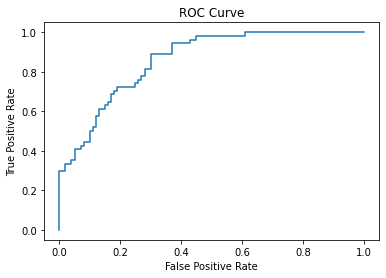

In [97]:
plt.title('ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot(fpr,tpr)
plt.savefig("ROC_Curve.png")